### Start

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    
# Import the data
signal_data = pd.read_hdf("/dice/projects/CMS/Hinv/datasets_for_ml_training/ttH/df_ml_inputs.hd5")
background_data = pd.read_hdf("/dice/projects/CMS/Hinv/datasets_for_ml_training/ttBar/df_ml_inputs.hd5")

# Remove regions 1-5 as they contain data not suitable for training

signal_data = signal_data[~signal_data.region.isin([1, 2, 3, 4, 5])]
background_data = background_data[~background_data.region.isin([1, 2, 3, 4, 5])]

In [6]:
signal_data

,dataset,entry,DiJet_mass,HT,InputMet_InputJet_mindPhi,InputMet_phi,InputMet_pt,MHT_phi,MHT_pt,MinChi,...,hashed_filename,ldphi_bjet,ldphi_jet,ncleanedBJet,ncleanedJet,region,sdphi_bjet,sdphi_jet,weight_nominal,xs_weight
0,ttH125,13,341.072355,640.688171,1.371094,-2.791016,421.000,-2.723288,391.416199,0.989503,...,2056500955164308770,2.612549,2.612549,2,5,0,1.369123,2.165998,9.393444e-08,8.695861e-08
1,ttH125,41,438.984885,572.167297,0.222534,-1.810547,223.250,-2.031608,217.169205,0.888001,...,2056500955164308770,1.573730,2.722656,1,8,8,NaN,2.544904,1.049098e-07,8.695861e-08
2,ttH125,103,216.669163,483.973785,0.987305,-2.919922,267.750,-2.735934,229.776871,1.249071,...,2056500955164308770,1.800764,1.800764,3,7,0,2.462873,2.112305,1.068131e-07,8.695861e-08
3,ttH125,128,282.625573,537.730591,0.949219,-1.981445,213.250,-2.077984,223.895447,1.088281,...,2056500955164308770,1.633771,3.082990,1,6,9,NaN,0.948242,9.954075e-08,8.695861e-08
4,ttH125,130,363.934216,565.500122,1.049805,1.896484,217.750,1.843299,224.203979,0.987971,...,2056500955164308770,1.700562,2.146467,1,5,0,NaN,1.049805,9.075116e-08,8.695861e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199763,ttH125,57310,523.098233,864.275208,0.422607,-1.495117,288.750,-1.452956,250.496109,0.417003,...,-921272031384707815,0.422852,3.023420,1,6,6,NaN,0.422852,8.953162e-08,8.695861e-08
199765,ttH125,57392,116.419080,1107.019287,0.202881,0.270264,259.750,0.125129,257.455353,0.082483,...,-921272031384707815,3.043701,2.989014,2,7,6,0.202881,3.043701,8.746902e-08,8.695861e-08
199766,ttH125,57459,511.200692,1002.960999,0.073547,0.785156,245.875,0.937051,249.904587,0.145308,...,-921272031384707815,2.931623,2.476545,1,8,6,NaN,2.882795,9.802411e-08,8.695861e-08
199767,ttH125,57467,271.667337,525.788696,1.009766,0.736328,210.500,0.749469,226.901993,1.204100,...,-921272031384707815,1.010742,2.265625,1,5,0,NaN,1.966797,1.098082e-07,8.695861e-08


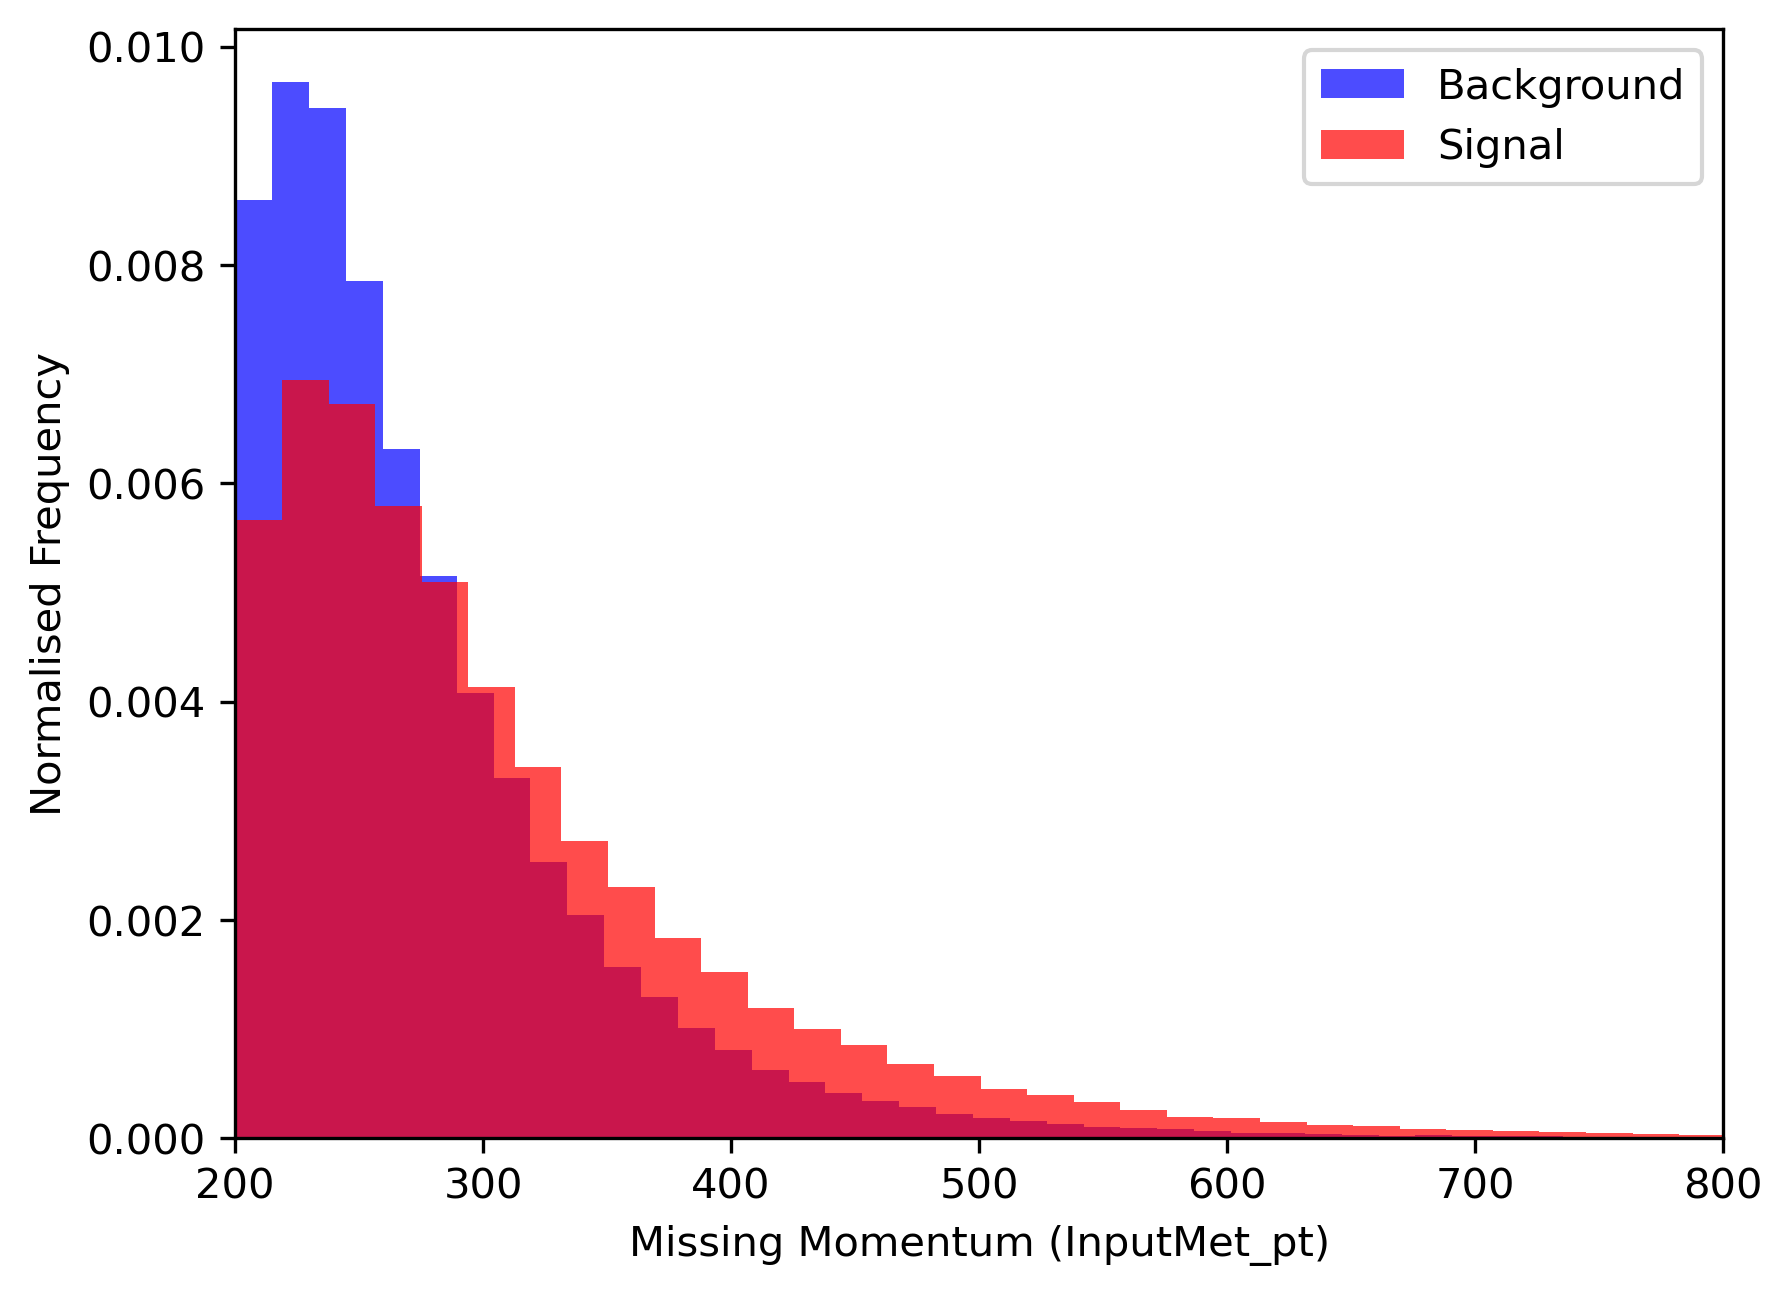

In [7]:
# Plot the signal and background data
# Create histograms for missing momentum for signal and background

plt.figure(dpi=300)
plt.hist(background_data["InputMet_pt"], bins=100, alpha=0.7, label='Background', color='blue', density=True, weights=background_data["weight_nominal"]*140000)
plt.hist(signal_data["InputMet_pt"], bins=100, alpha=0.7, label='Signal', color='red', density=True, weights=signal_data["weight_nominal"]*140000)

plt.xlabel('Missing Momentum (InputMet_pt)')
plt.ylabel('Normalised Frequency')

# Cutoff x axis at 1000
plt.xlim(200,800)

plt.legend(loc='upper right')


Total area under the background histogram: 67917.94285870605
Total area under the signal histogram: 1859.2585931982212


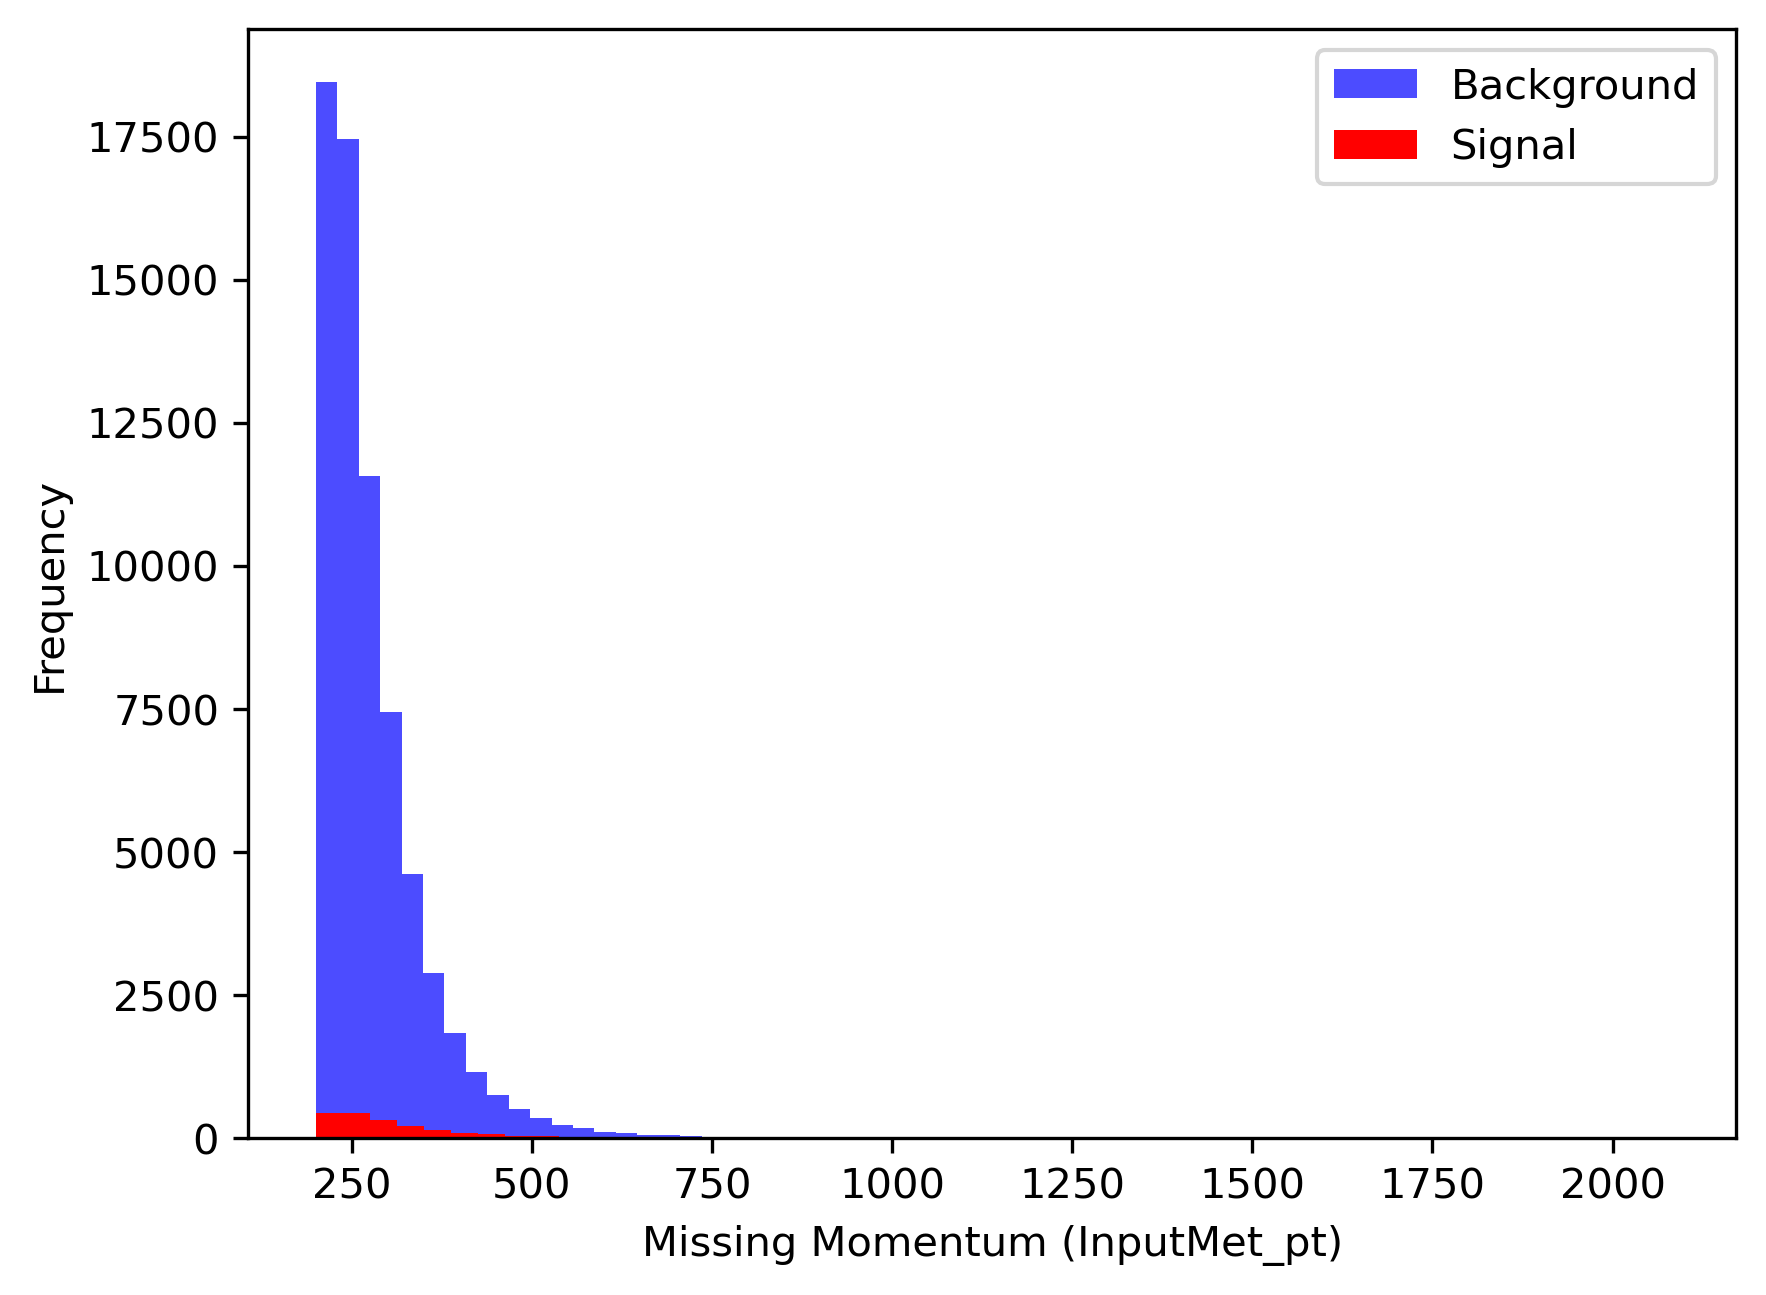

In [8]:
import matplotlib.pyplot as plt

# Create histograms for missing momentum for signal and background
plt.figure(dpi=300)

# Plot and capture the histogram data for background
background_hist = plt.hist(
    background_data["InputMet_pt"],
    bins=50,
    alpha=0.7,
    label='Background',
    color='blue',
    weights=background_data["weight_nominal"] * 140000
)

# Plot and capture the histogram data for signal
signal_hist = plt.hist(
    signal_data["InputMet_pt"],
    bins=50,
    alpha=1,
    label='Signal',
    color='red',
    weights=signal_data["weight_nominal"] * 140000
)

# Labeling
plt.xlabel('Missing Momentum (InputMet_pt)')
plt.ylabel('Frequency')

plt.legend(loc='upper right')

# Calculate the total areas (sum of frequencies for each histogram)
background_area = sum(background_hist[0])
signal_area = sum(signal_hist[0])

# Print the areas
print(f"Total area under the background histogram: {background_area}")
print(f"Total area under the signal histogram: {signal_area}")

# Display the plot
plt.show()


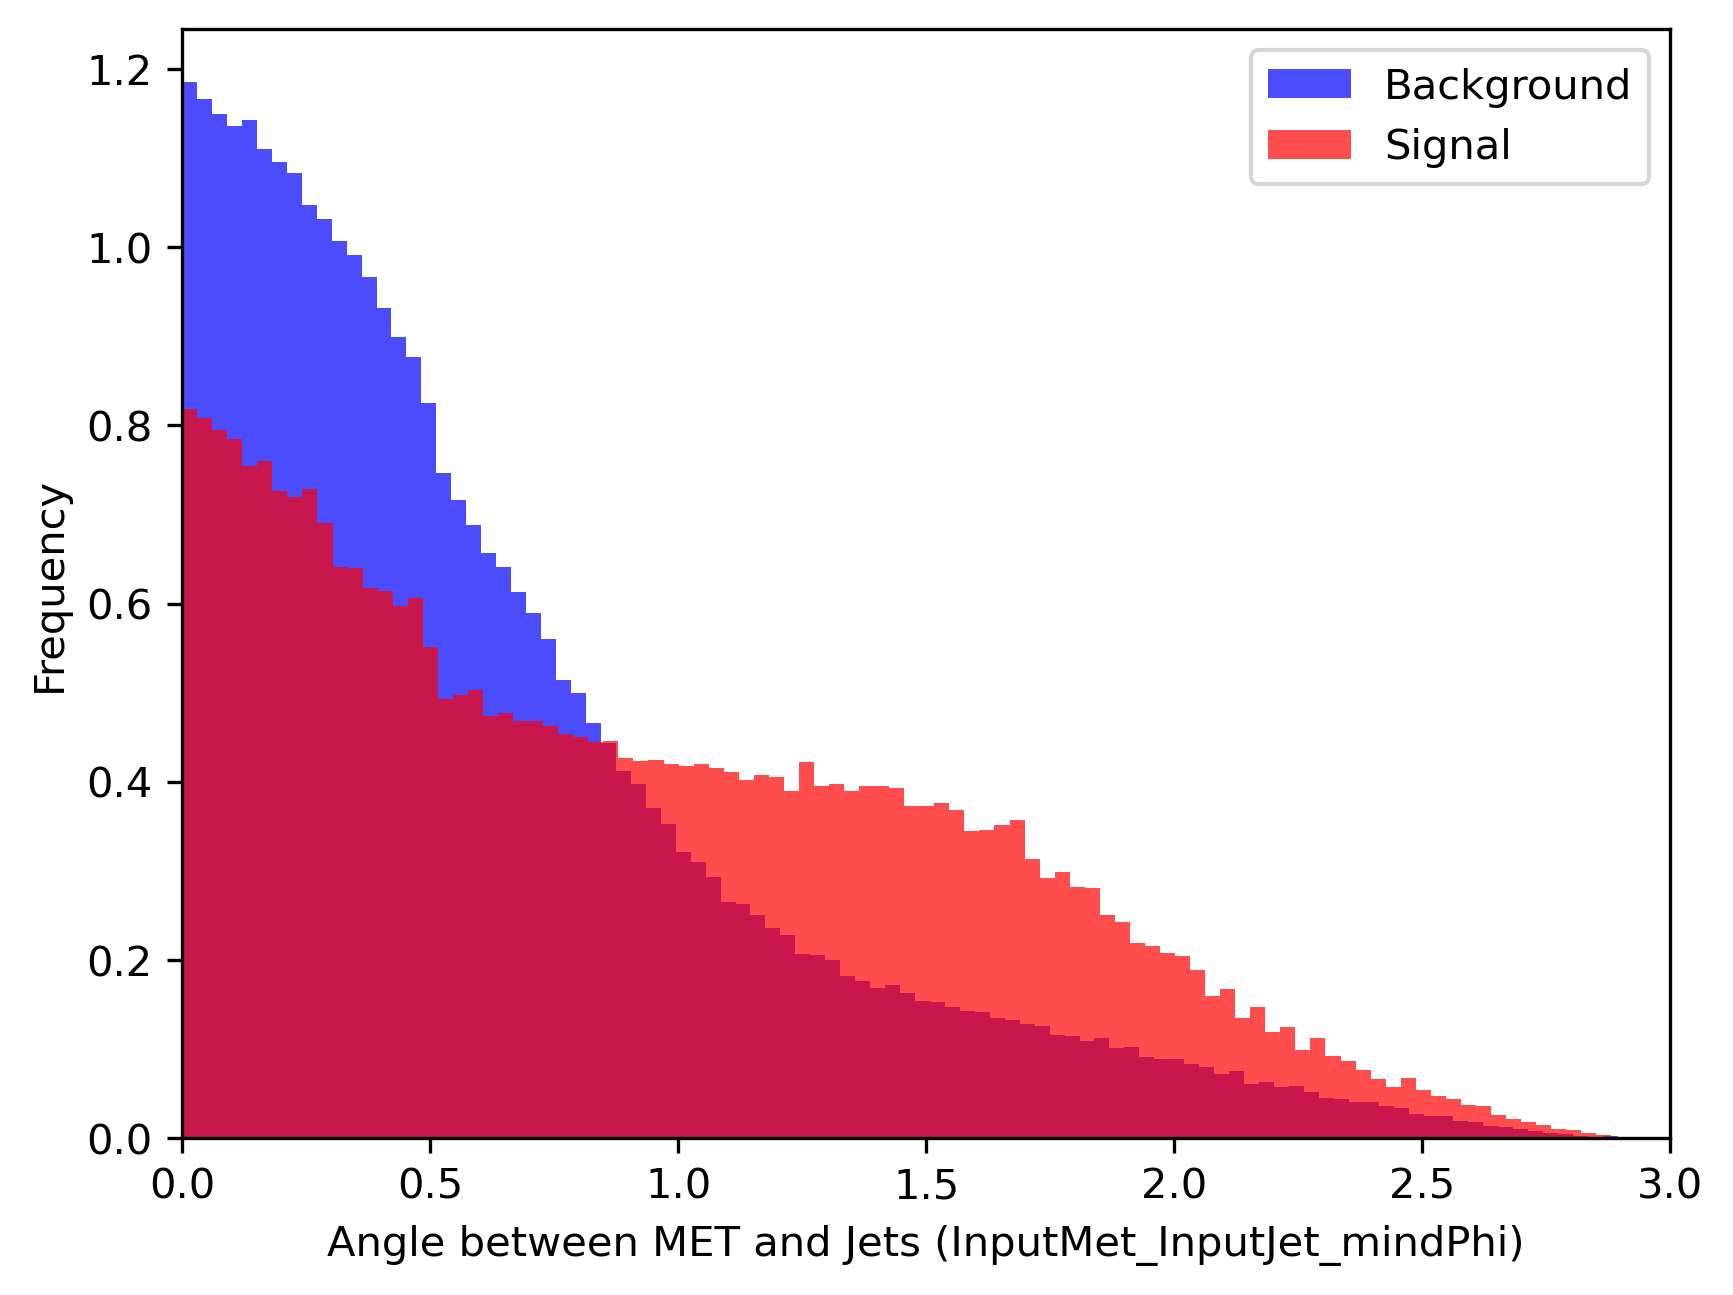

In [9]:
# Plot the signal and background data

import matplotlib.pyplot as plt

# Create histograms for missing momentum for signal and background

plt.figure(dpi=300)
plt.hist(background_data["InputMet_InputJet_mindPhi"], bins=100, alpha=0.7, label='Background', color='blue', density=True, weights=background_data["weight_nominal"]*140000)
plt.hist(signal_data["InputMet_InputJet_mindPhi"], bins=100, alpha=0.7, label='Signal', color='red', density=True, weights=signal_data["weight_nominal"]*140000)

# plt.yscale('log')
plt.xlabel('Angle between MET and Jets (InputMet_InputJet_mindPhi)')
plt.ylabel('Frequency')
plt.xlim(0,3)

plt.legend(loc='upper right')


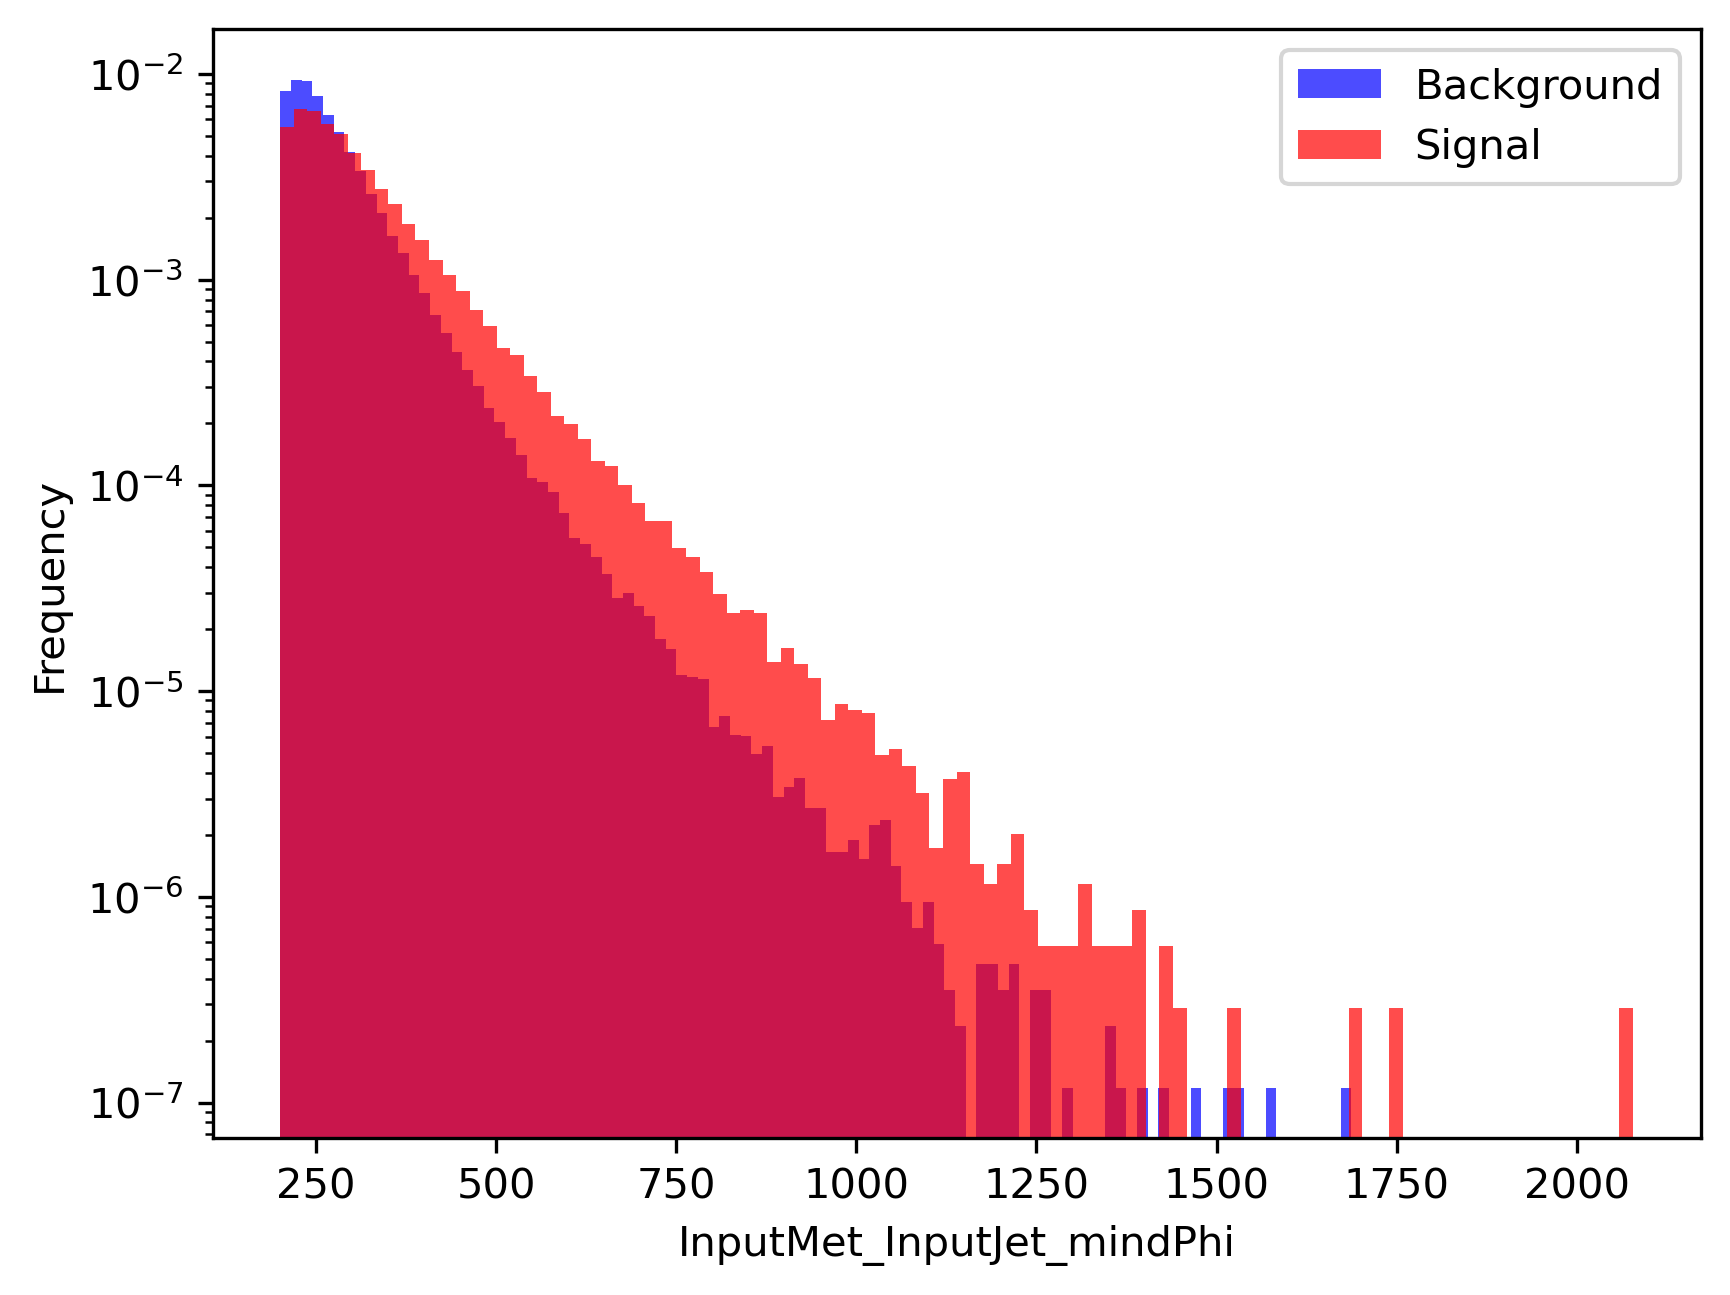

In [10]:
# Plot the signal and background data

import matplotlib.pyplot as plt

# Create histograms for missing momentum for signal and background

plt.figure(dpi=300)
plt.hist(background_data["InputMet_pt"], bins=100, alpha=0.7, label='Background', color='blue', density=True)
plt.hist(signal_data["InputMet_pt"], bins=100, alpha=0.7, label='Signal', color='red', density=True)

plt.yscale('log')
plt.xlabel('InputMet_InputJet_mindPhi')
plt.ylabel('Frequency')

plt.legend(loc='upper right')

### XGBoost 1

In [11]:
# Use XGBoost to train a model

import xgboost as xgb

# Use all deatures except the target

In [12]:
import pandas as pd

# Create a new column for the target

signal_data['target'] = 1
background_data['target'] = 0

# Combine signal and data

all_data = pd.concat([signal_data, background_data])

# Remove columns with NaN values

all_data = all_data.dropna()

# Print column types

print(all_data.dtypes)

# Remove columns with object type

all_data = all_data.select_dtypes(exclude=['object'])

# Define the features and target

X = all_data.drop(columns=['target', 'weight_nominal', 'xs_weight', 'hashed_filename', 'entry', 'Pred', 'region'])

y = all_data['target']

# Split into train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the DMatrix (runs faster than using a DataFrame)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Create model

model = xgb.XGBClassifier()

# Train the model

model.fit(X_train, y_train)

# Make predictions

y_pred = model.predict(X_test)

# Plot the proba 

y_proba = model.predict_proba(X_test)

dataset                       object
entry                          int64
DiJet_mass                   float64
HT                           float32
InputMet_InputJet_mindPhi    float32
InputMet_phi                 float32
InputMet_pt                  float32
MHT_phi                      float32
MHT_pt                       float32
MinChi                       float32
MinOmegaHat                  float32
MinOmegaTilde                float32
Pred                         float32
cleanedJet_area               object
cleanedJet_btagDeepB          object
cleanedJet_eta                object
cleanedJet_mass               object
cleanedJet_phi                object
cleanedJet_pt                 object
hashed_filename                int64
ldphi_bjet                   float64
ldphi_jet                    float64
ncleanedBJet                   int64
ncleanedJet                    int64
region                         int32
sdphi_bjet                   float64
sdphi_jet                    float64
w

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

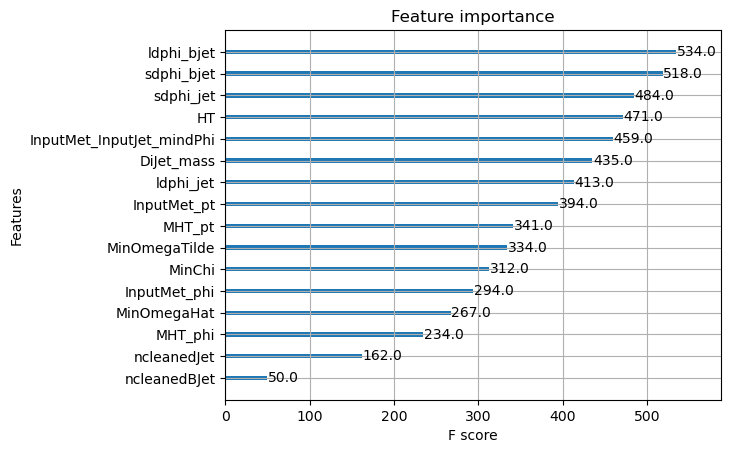

In [13]:
# PLot feature importance

xgb.plot_importance(model)



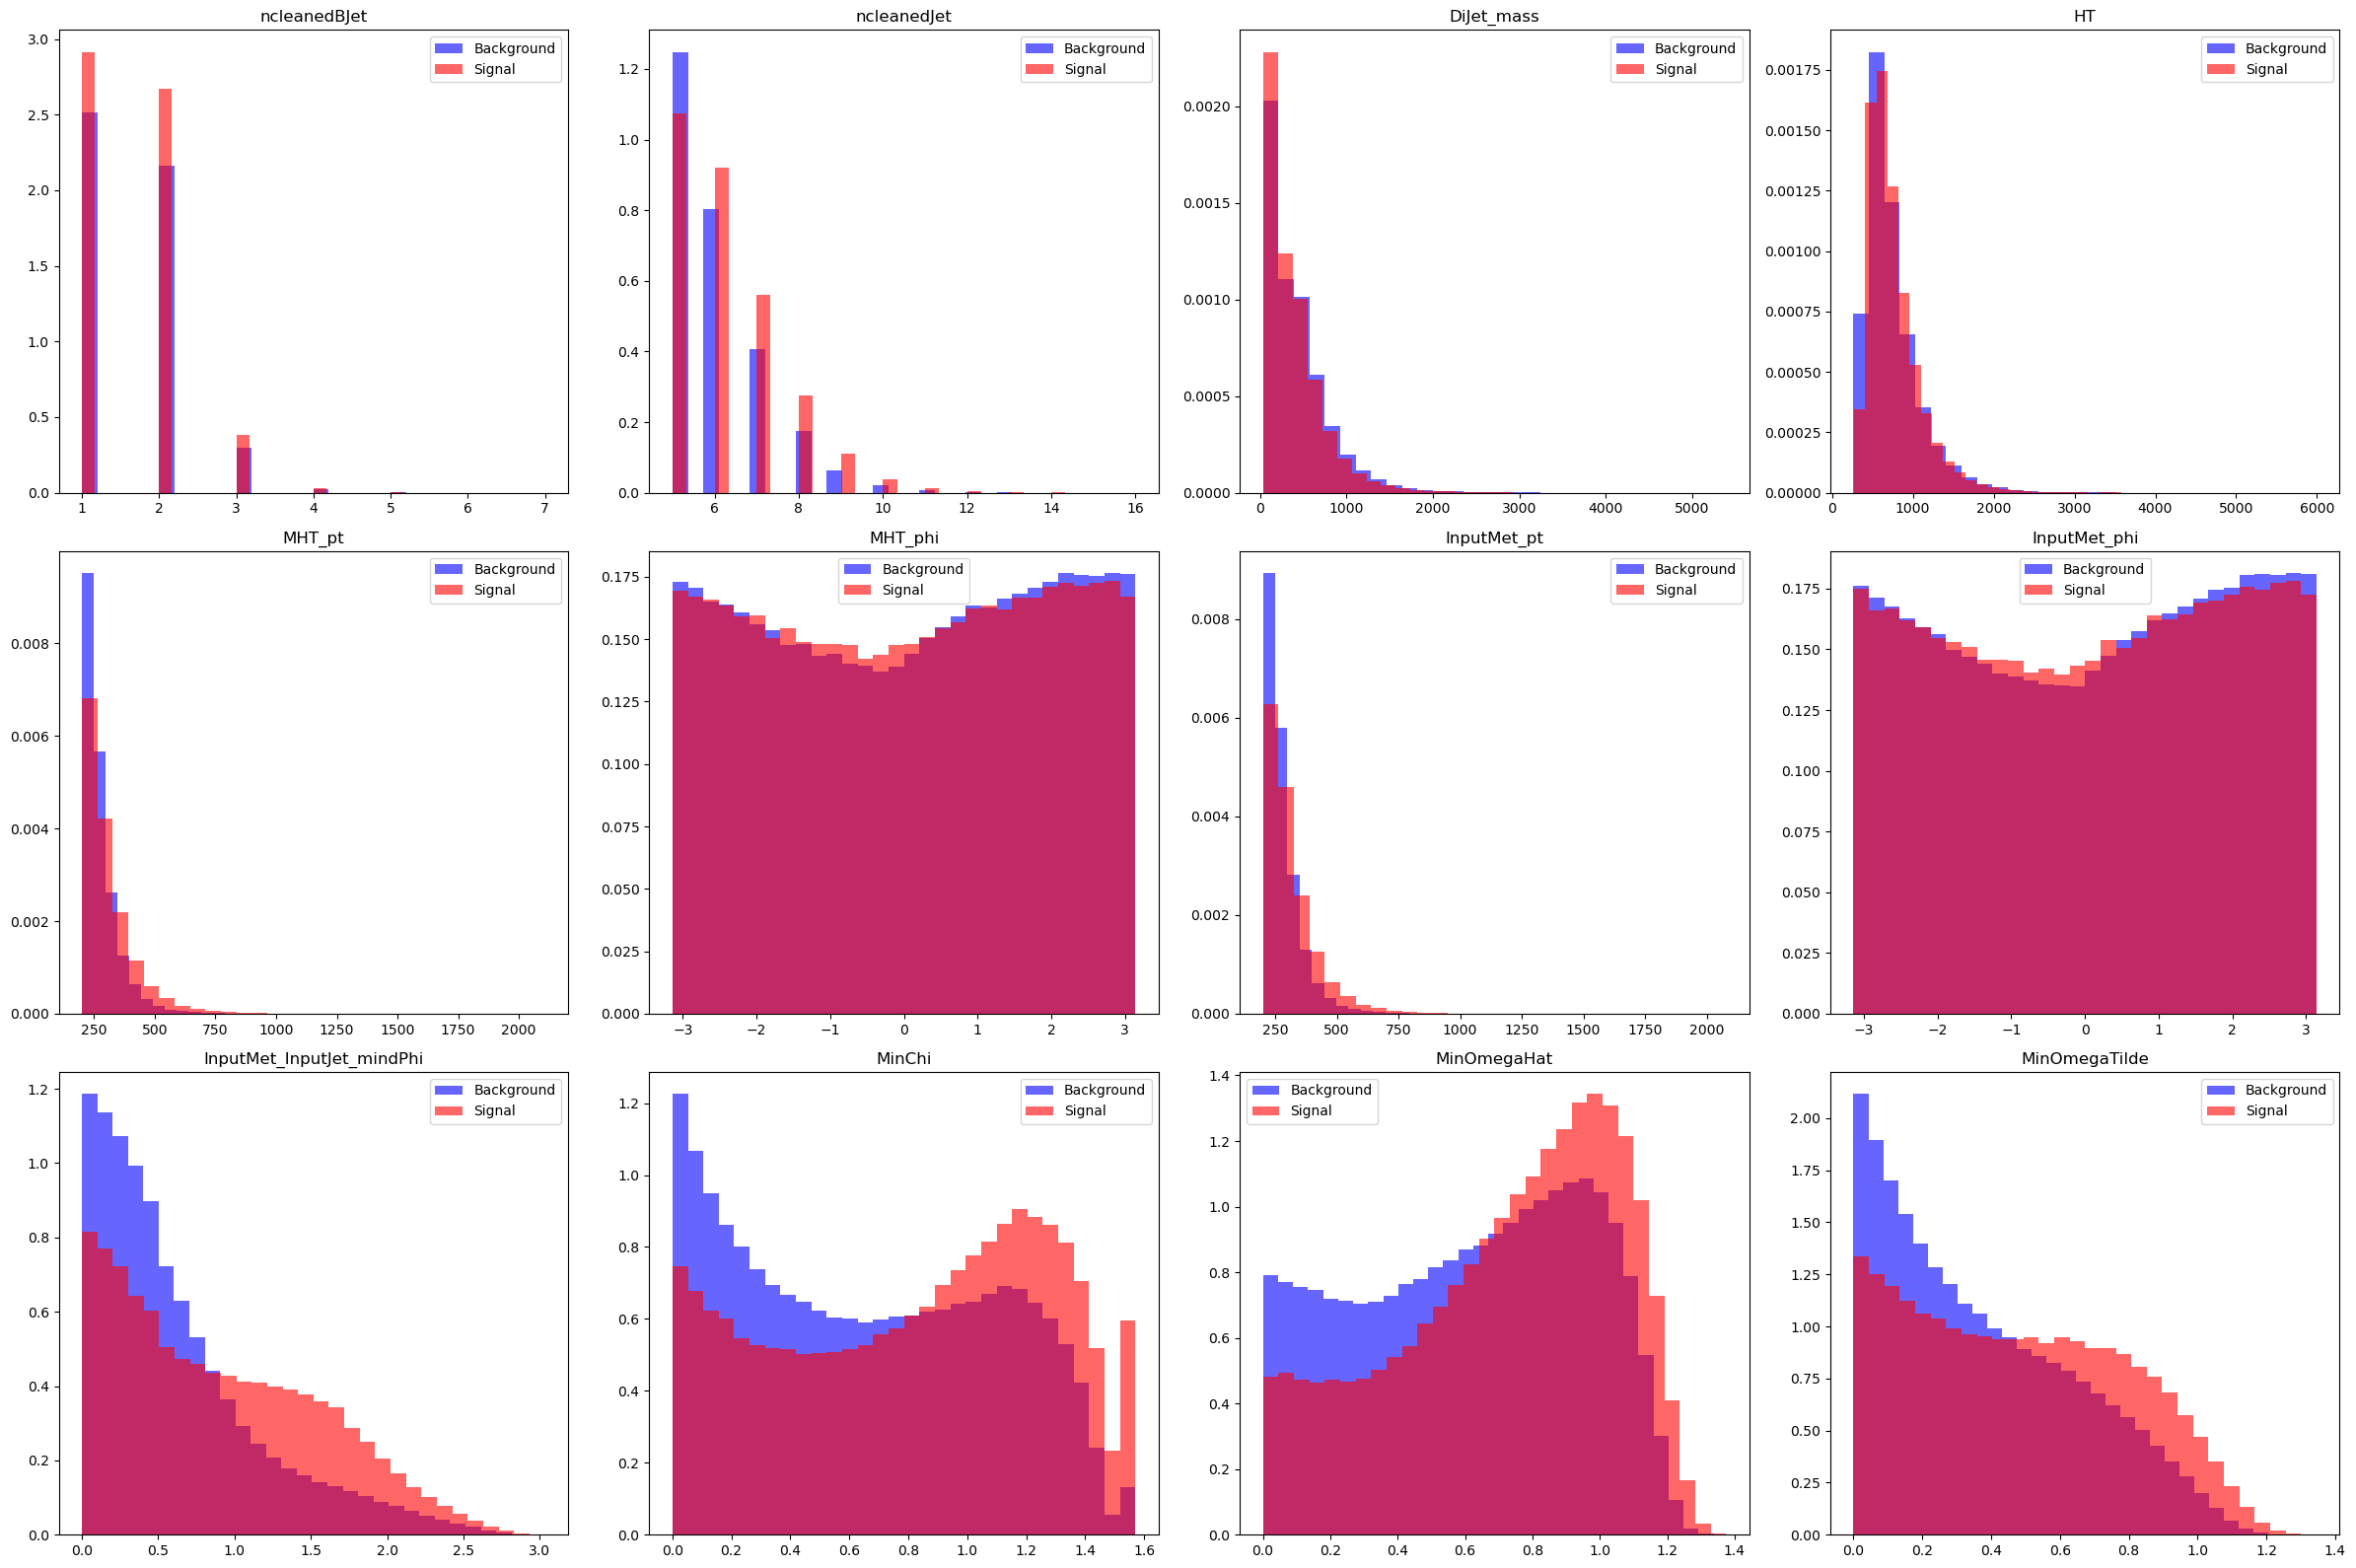

In [14]:
# Plotting all features

features_of_interest = [
    'ncleanedBJet', 'ncleanedJet', 'DiJet_mass', 'HT', 'MHT_pt', 'MHT_phi', 
    'InputMet_pt', 'InputMet_phi', 'InputMet_InputJet_mindPhi',
    'MinChi', 'MinOmegaHat', 'MinOmegaTilde'
]
# Create a grid of subplots
fig, axes = plt.subplots(len(features_of_interest)//4 + len(features_of_interest) % 4, 4, figsize=(24, 16))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature in the grid
for i, feature in enumerate(features_of_interest):
    ax = axes[i]
    # Plot normalized histograms for signal and background
    ax.hist(background_data[feature], bins=30, density=True, alpha=0.6, color='blue', label='Background')
    ax.hist(signal_data[feature], bins=30, density=True, alpha=0.6, color='red', label='Signal')

    ax.set_title(feature)
    ax.legend()

# Hide any unused subplots (if necessary)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



In [15]:
print(signal_data["cleanedJet_area"])

0         [0.5185547, 0.5185547, 0.40893555, 0.5185547, ...
1         [0.4987793, 0.50878906, 0.5185547, 0.5185547, ...
2         [0.4987793, 0.47875977, 0.48876953, 0.5288086,...
3         [0.50878906, 0.50878906, 0.50878906, 0.5185547...
4         [0.50878906, 0.46875, 0.5185547, 0.48876953, 0...
                                ...                        
199763    [0.47875977, 0.4987793, 0.5185547, 0.4189453, ...
199765    [0.42895508, 0.35913086, 0.48876953, 0.3989257...
199766    [0.47875977, 0.4987793, 0.44873047, 0.50878906...
199767    [0.5385742, 0.50878906, 0.4387207, 0.5385742, ...
199769    [0.4987793, 0.47875977, 0.5185547, 0.50878906,...
Name: cleanedJet_area, Length: 184282, dtype: object


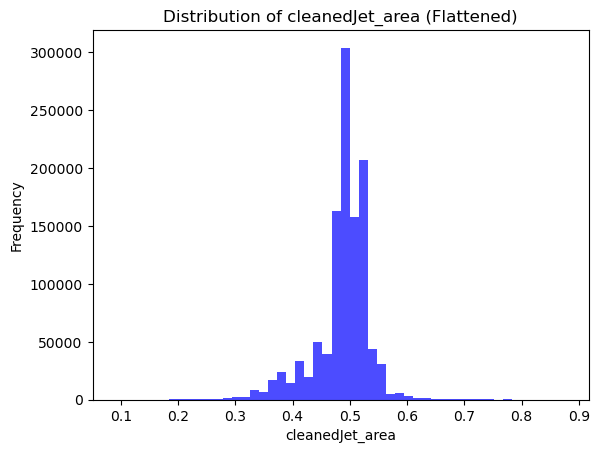

In [16]:
cleanedJet_area = signal_data["cleanedJet_area"]
flattened_data = np.concatenate(cleanedJet_area.values)

# Now you can visualize the flattened data
plt.hist(flattened_data, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of cleanedJet_area (Flattened)')
plt.xlabel('cleanedJet_area')
plt.ylabel('Frequency')
plt.show()

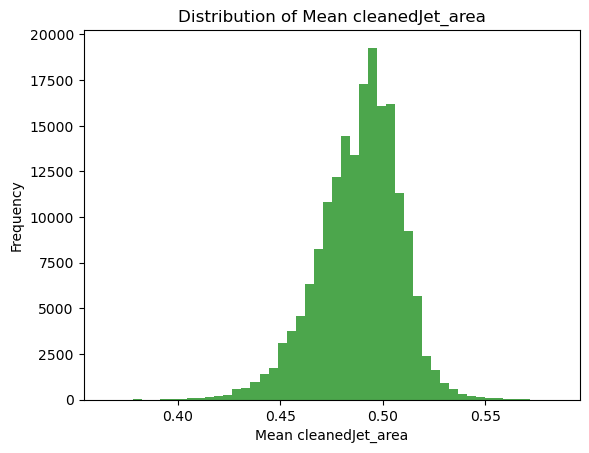

In [17]:
# Calculate the mean of each sub-array
mean_cleanedJet_area = cleanedJet_area.apply(lambda x: np.mean(x))

# Plot the distribution of mean values
plt.hist(mean_cleanedJet_area, bins=50, color='green', alpha=0.7)
plt.title('Distribution of Mean cleanedJet_area')
plt.xlabel('Mean cleanedJet_area')
plt.ylabel('Frequency')
plt.show()


In [18]:
cleanedJet_area[0]

array([0.5185547 , 0.5185547 , 0.40893555, 0.5185547 , 0.47875977],
      dtype=float32)

# Class Imbalance

In [19]:
# Dealing with class inbalance

print(signal_data.shape)
print(background_data.shape)

(184282, 30)
(570262, 30)


In [20]:
# Step 1: Calculate total weight for the original background
total_background_weight = background_data['weight_nominal'].sum()

# Step 2: Randomly sample x rows from the background data
sampled_background = background_data.sample(len(signal_data), random_state=42)

# Step 3: Calculate the total weight of the sampled background (before scaling)
sampled_background_weight = sampled_background['weight_nominal'].sum()

# Step 4: Compute the scaling factor to adjust the weights
scaling_factor = total_background_weight / sampled_background_weight

# Step 5: Scale the weights of the sampled background rows
sampled_background['weight_nominal_scaled'] = sampled_background['weight_nominal'] * scaling_factor

# Step 6: Now, the total weight of the sampled background matches the original background weight
print(f"Total Original Background Weight: {total_background_weight}")
print(f"Total Sampled Background Weight (after scaling): {sampled_background['weight_nominal_scaled'].sum()}")

# Step 7: Ensure signal and background now have the same number of rows
print(f"Number of Signal Rows: {len(signal_data)}")
print(f"Number of Background Rows: {len(sampled_background)}")

# Add scaled weight ot the signal data

signal_data['weight_nominal_scaled'] = signal_data['weight_nominal']

Total Original Background Weight: 0.4851281632764721
Total Sampled Background Weight (after scaling): 0.4851281632764719
Number of Signal Rows: 184282
Number of Background Rows: 184282


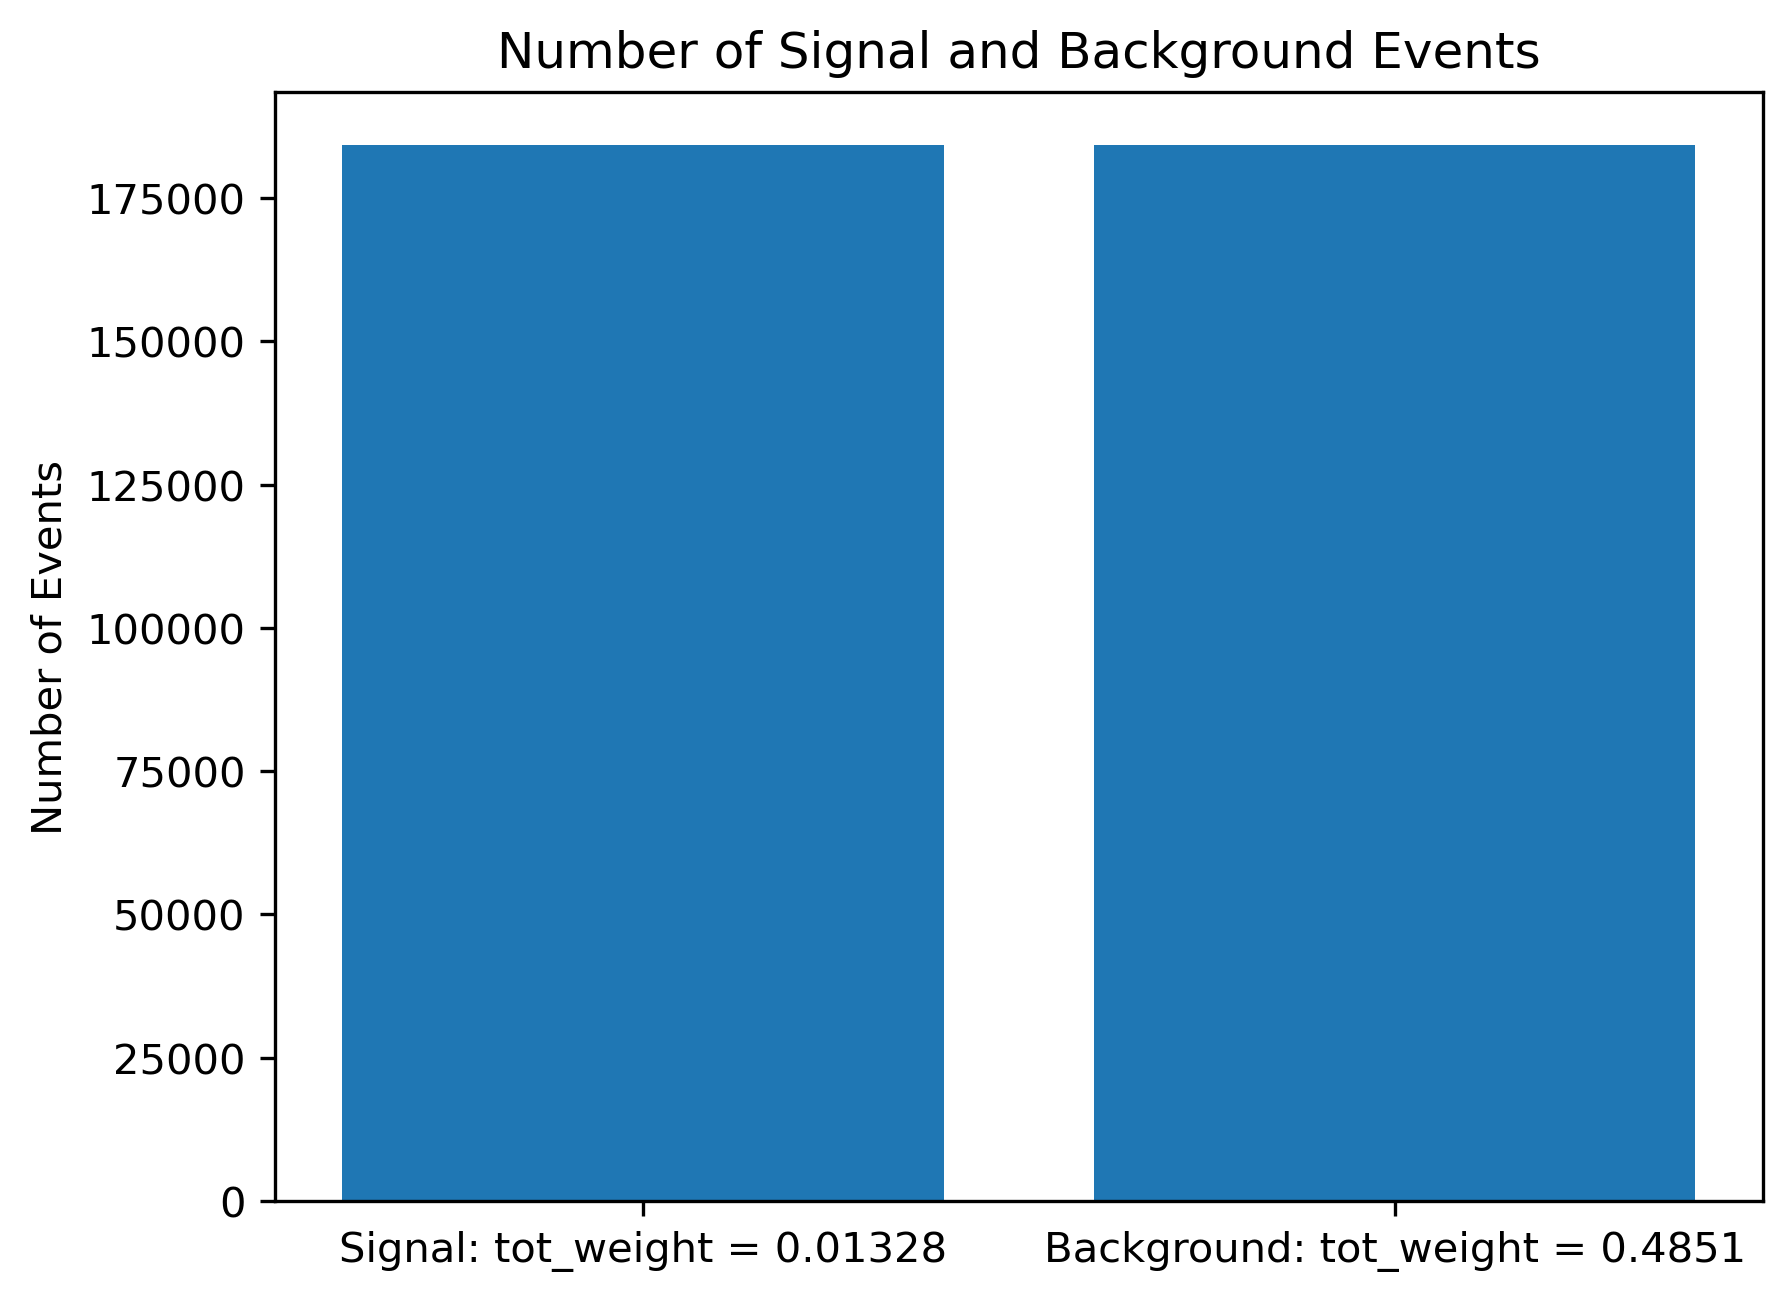

In [21]:
# Now plot the number of events of signal and sample background data

plt.figure(dpi=300)
plt.bar([0, 1], [len(signal_data), len(sampled_background)])
plt.xticks([0, 1], [f'Signal: tot_weight = {np.sum(signal_data["weight_nominal"]):.4g}', f'Background: tot_weight = {np.sum(background_data["weight_nominal"]):.4g}'])

plt.ylabel('Number of Events')
plt.title('Number of Signal and Background Events')
plt.show()



# XGboost 2

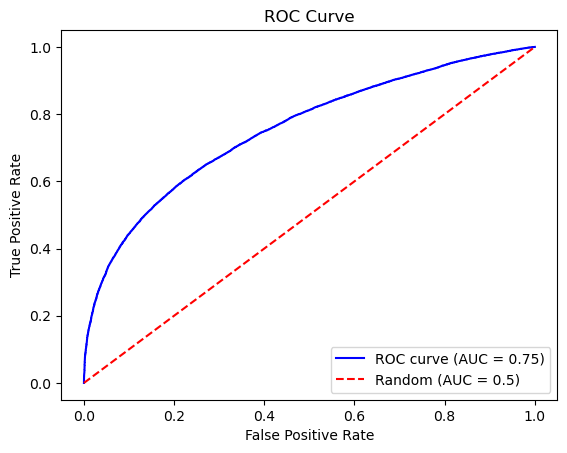

Accuracy: 0.6887


In [22]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

model = xgb.XGBClassifier()

# Define the features and target

signal_data['target'] = 1
sampled_background['target'] = 0
data = pd.concat([signal_data, sampled_background])
data = data.dropna()
data = data.select_dtypes(exclude=['object'])

# Rememebr the weights
weights = data['weight_nominal_scaled']

X = data.drop(columns=['target', 'weight_nominal', 'weight_nominal_scaled', 'xs_weight', 'hashed_filename', 'entry', 'Pred', 'region'])
y = data['target']

# Split into train and test data

X_train, X_test, y_train, y_test, train_weights, test_weights = train_test_split(X, y, weights, test_size=0.2, random_state=42)

# Train the model and run predictions

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot the proba
y_proba = model.predict_proba(X_test)

# Plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_proba[:, 1])

# Create the plot

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')

# Plot the diagonal line representing random chance (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random (AUC = 0.5)')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Add a legend
plt.legend(loc="lower right")

# Display the plot
plt.show()

# Print accuracy

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


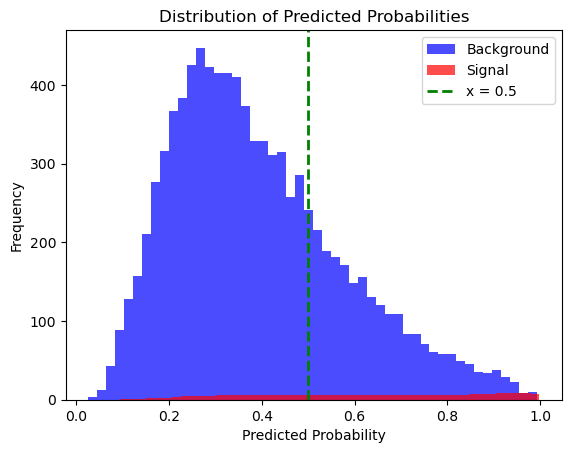

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Separate the probabilities and scaled weights for signal and background
signal_proba = y_proba[y_test == 1][:, 1]
background_proba = y_proba[y_test == 0][:, 1]
signal_weights = test_weights[y_test == 1] * 200000
background_weights = test_weights[y_test == 0] * 200000

# Plot histograms for signal and background
plt.hist(
    background_proba,
    bins=50,
    color='blue',
    alpha=0.7,
    label='Background',
    weights=background_weights
)
plt.hist(
    signal_proba,
    bins=50,
    color='red',
    alpha=0.7,
    label='Signal',
    weights=signal_weights
)

# Add a vertical line at x = 0.5
plt.axvline(x=0.5, color='green', linestyle='--', linewidth=2, label='x = 0.5')

# Add labels and title
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Display the plot
plt.show()


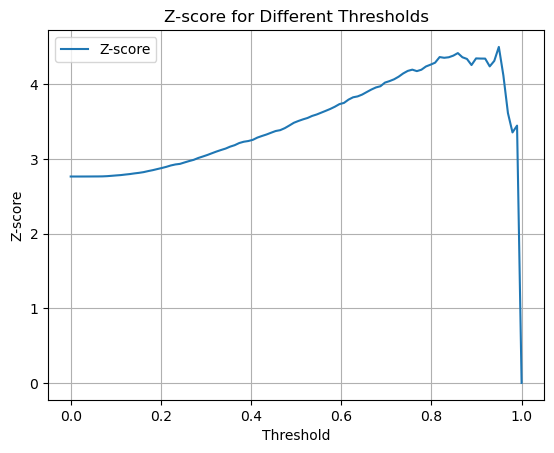

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define thresholds to evaluate
thresholds = np.linspace(0, 1, 100)
z_scores = []

for threshold in thresholds:
    # Calculate weighted counts (areas) for signal and background on the right side of the threshold
    S = np.sum(signal_weights[signal_proba >= threshold])
    B = np.sum(background_weights[background_proba >= threshold])
    
    # Calculate Z-score if B > 0 to avoid division by zero
    if B > 0:
        Z = S / np.sqrt(B)
    else:
        Z = 0  # Or handle this case as needed
    
    z_scores.append(Z)

# Plot Z-scores against thresholds
plt.plot(thresholds, z_scores, label='Z-score')
plt.xlabel('Threshold')
plt.ylabel('Z-score')
plt.title('Z-score for Different Thresholds')
plt.legend()
plt.grid()
plt.show()


# MLP

In [25]:
# Use mlp classifier form sk learn

from sklearn.neural_network import MLPClassifier

# Create the model

model = MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=500)

# Train the model

model.fit(X_train, y_train)

# Make predictions

y_pred = model.predict(X_test)

# Plot the proba

y_proba = model.predict_proba(X_test)

# Plot the ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC curve

fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])

# Calculate the AUC (Area Under the Curve)

roc_auc = roc_auc_score(y_test, y_proba[:, 1])



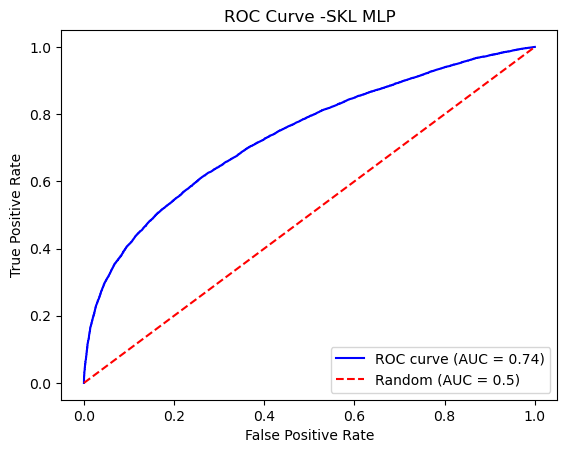

In [26]:

# Plot the ROC curve

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')

# Plot the diagonal line representing random chance (AUC = 0.5)

plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random (AUC = 0.5)')

# Add labels and title

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve -SKL MLP')
plt.legend(loc="lower right")

# Torch

Epoch 1, Loss: 1.1065055787184974e-06
Epoch 1, Loss: 2.831995686847222e-07
Epoch 1, Loss: 1.8756625763671764e-07
Epoch 1, Loss: 1.8682415259263507e-07
Epoch 1, Loss: 1.7570519617038372e-07
Epoch 1, Loss: 1.7291758069859497e-07
Epoch 1, Loss: 1.85258954843448e-07
Epoch 1, Loss: 1.4801118197738106e-07
Epoch 1, Loss: 1.628772849926463e-07
Epoch 1, Loss: 2.2453174608472182e-07
Epoch 1, Loss: 1.637663729070482e-07
Epoch 1, Loss: 1.9236780701703537e-07
Epoch 1, Loss: 2.0918076870657387e-07
Epoch 1, Loss: 2.1488773427336127e-07
Epoch 1, Loss: 1.79165908775758e-07
Epoch 1, Loss: 2.1317592313607747e-07
Epoch 1, Loss: 1.9879601609318343e-07
Epoch 1, Loss: 1.9291044850433536e-07
Epoch 1, Loss: 1.8386559474947717e-07
Epoch 1, Loss: 1.608789546025946e-07
Epoch 1, Loss: 1.9022931496692763e-07
Epoch 1, Loss: 1.4919356772225e-07
Epoch 1, Loss: 1.8821555158865522e-07
Epoch 1, Loss: 1.748746996099726e-07
Epoch 1, Loss: 1.756385330509147e-07
Epoch 1, Loss: 1.5204378200905921e-07
Epoch 1, Loss: 1.93717539

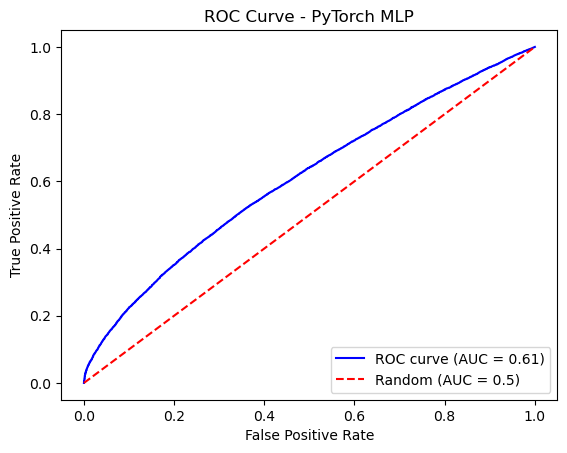

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Create the data
signal_data['target'] = 1
sampled_background['target'] = 0
data = pd.concat([signal_data, sampled_background])
data = data.dropna()
data = data.select_dtypes(exclude=['object'])

features_of_interest = [
    'ncleanedBJet', 'ncleanedJet', 'DiJet_mass', 'HT', 'MHT_pt', 'MHT_phi', 
    'InputMet_pt', 'InputMet_phi', 'InputMet_InputJet_mindPhi',
    'MinChi', 'MinOmegaHat', 'MinOmegaTilde'
]

X = data[features_of_interest]
y = data['target']
weights = data['weight_nominal_scaled']

# Split into train and test data
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    X, y, weights, test_size=0.2, random_state=42
)

# Define the model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(12, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # No softmax here
        return x

# Create the model
model = MLP()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss(reduction='none')  # 'none' to get the loss for each sample
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
weights_train_tensor = torch.tensor(weights_train.values, dtype=torch.float32)  # Event-specific weights

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create a DataLoader, include the weights in the TensorDataset
train_data = TensorDataset(X_train_tensor, y_train_tensor, weights_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Train the model with event-specific weights
model.train()
for epoch in range(10):
    for i, data in enumerate(train_loader):
        inputs, labels, sample_weights = data
        
        optimizer.zero_grad()
        outputs = model(inputs)
        
        # Calculate loss for each sample in the batch
        loss = criterion(outputs, labels)
        
        # Apply the event-specific weights to the loss
        weighted_loss = loss * sample_weights
        
        # Take the mean of the weighted loss
        weighted_loss = weighted_loss.mean()
        
        weighted_loss.backward()
        optimizer.step()

        if i % 100 == 0:
            print(f'Epoch {epoch + 1}, Loss: {weighted_loss.item()}')

# Make predictions
model.eval()
with torch.no_grad():
    logits = model(X_test_tensor)
    y_proba = torch.softmax(logits, dim=1)  # Apply softmax to get probabilities

# Extract probability of the positive class (class 1)
y_proba_class1 = y_proba[:, 1].numpy()

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test_tensor, y_proba_class1)
roc_auc = roc_auc_score(y_test_tensor, y_proba_class1)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - PyTorch MLP')
plt.legend(loc="lower right")
plt.show()
